#### Student Depression Variable Imputation

**Name:** Alexis Michell Hernandez Robledo


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Dataset

In [2]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


#### Exploratory Data Analysis

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB
None
              Age         Income  Registered
count  103.000000     103.000000  103.000000
mean    29.573987   51079.867179    0.504854
std     13.137300   21167.304578    0.502421
min     -5.000000   -1000.000000    0.000000
25%     23.988273   37726.305475    0.000000
50%     28.843517   51028.444622    1.000000
75%     34.967142   58315.989946    1.000000
max    120.000000  200000.000000    1.000000
Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


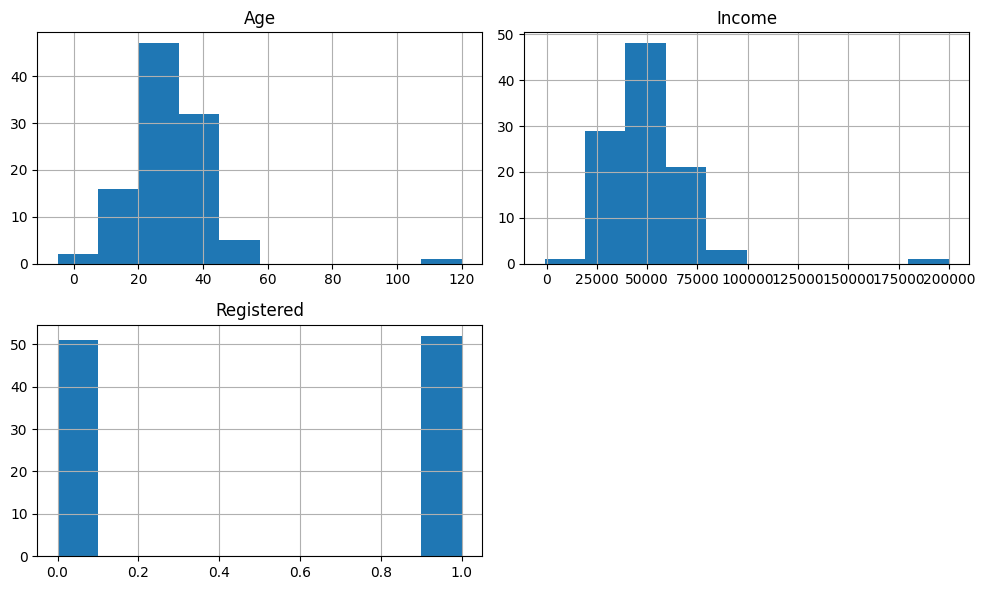

In [4]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

#### Data Cleaning

In [5]:

# Normalize case (e.g., 'MALE', 'male', 'Male' -> 'Male')
df['Gender'] = df['Gender'].str.strip().str.lower().str.capitalize()

# Fill missing values with the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Check unique values
print(df['Gender'].value_counts())

Gender
Male      53
Female    31
Femle     10
Femael    10
Name: count, dtype: int64


In [6]:
# Only 1 missing value, fill with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df = pd.get_dummies(df, columns=['Gender', 'City'], drop_first=True)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

In [9]:
print(df.head())

        Age    Income  Registered  Gender_Female  Gender_Femle  Gender_Male  \
0  0.415061 -1.059158         1.0          False         False         True   
1 -0.072987 -0.350809         0.0           True         False        False   
2  0.531101 -0.295314         1.0          False         False         True   
3  1.203894 -0.622571         0.0           True         False        False   
4 -0.146688 -0.166118         1.0          False         False         True   

   City_New York  City_Paris  City_Tokyo  
0           True       False       False  
1          False        True       False  
2          False       False        True  
3          False       False       False  
4           True       False       False  


#### Variable Tranformations


In [10]:
df['Income_log'] = np.log1p(df['Income'])

# Categorize Age into bins
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[-np.inf, -1.0, 0.0, 1.0, np.inf], 
                        labels=['Very Low', 'Low', 'Medium', 'High'])

# Show transformed variables
print(df[['Income', 'Income_log', 'Age', 'AgeGroup']].head())

     Income  Income_log       Age AgeGroup
0 -1.059158         NaN  0.415061   Medium
1 -0.350809   -0.432028 -0.072987      Low
2 -0.295314   -0.350003  0.531101   Medium
3 -0.622571   -0.974373  1.203894     High
4 -0.166118   -0.181663 -0.146688      Low


c:\Users\elber\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
